In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In this kernel we will use various predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud. As described in the dataset, the features are scaled and the names of the features are not shown due to privacy reasons. Nevertheless, we can still analyze some important aspects of the dataset.

In [113]:
df=pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# What we are trying to explore and solve?

Understand the little distribution of the "little" data that was provided to us.

Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions. (NearMiss Algorithm)

Determine the Classifiers we are going to use and decide which one has a higher accuracy.

Create a Neural Network and compare the accuracy to our best classifier.

Understand common mistaked made with imbalanced datasets.

In [114]:
df[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [115]:
print(df.isnull().sum())
print('No Null information')

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
No Null information


The first thing we must do is gather a basic sense of our data. 

Remember, except for the transaction and amount we dont know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already.

Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

# Feature Technicalities:
PCA Transformation: The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount).

Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)

In [116]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [117]:
print(df['Class'].value_counts(normalize=True))
print("Greatly Skewed Dataset towards non-fraud records")

0    0.998273
1    0.001727
Name: Class, dtype: float64
Greatly Skewed Dataset towards non-fraud records


Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [118]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

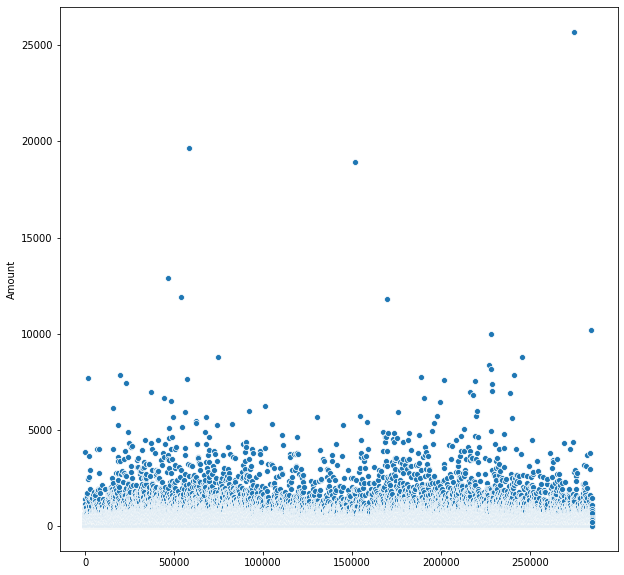

In [119]:
plt.figure(figsize=[10,10])
sns.scatterplot(x=df.index,y='Amount',data=df)

The mean is 88 and the vast mayority of the records oscilate between 0 a 5000 with a bunch of Outliers maxing in 25k

**Distributions:** By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

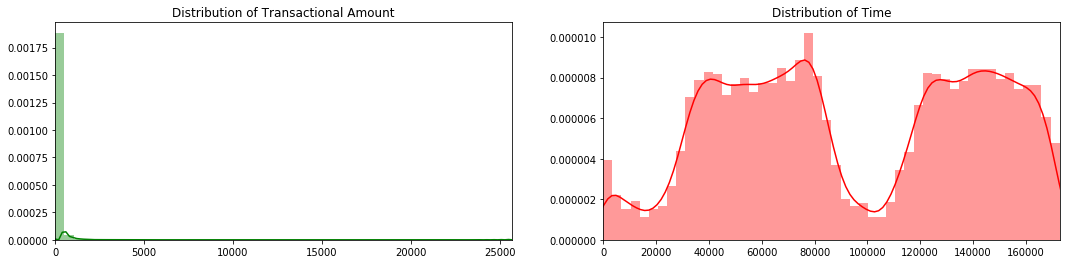

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_value=df['Amount'].values
time_value=df['Time'].values
sns.distplot(amount_value,ax=ax[0],color='g')
ax[0].set_title('Distribution of Transactional Amount')
ax[0].set_xlim(min(amount_value),max(amount_value))

sns.distplot(time_value,ax=ax[1],color='r')
ax[1].set_title('Distribution of Time')
ax[1].set_xlim(min(time_value),max(time_value))
plt.show()


In [121]:
time_delta=pd.to_timedelta(df['Time'],unit='s')
df['time_min']=(time_delta.dt.components.minutes).astype(int)
df['time_hour']=(time_delta.dt.components.hours).astype(int)

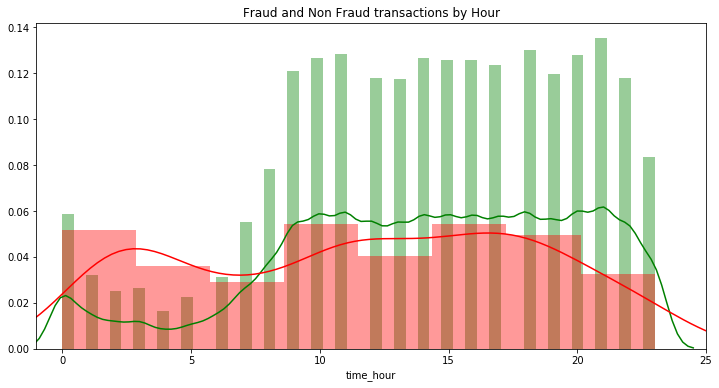

In [122]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Class']==0]['time_hour'],color='g')
sns.distplot(df[df['Class']==1]['time_hour'],color='r')
plt.title('Fraud and Non Fraud transactions by Hour')
plt.xlim([-1,25])
plt.show()


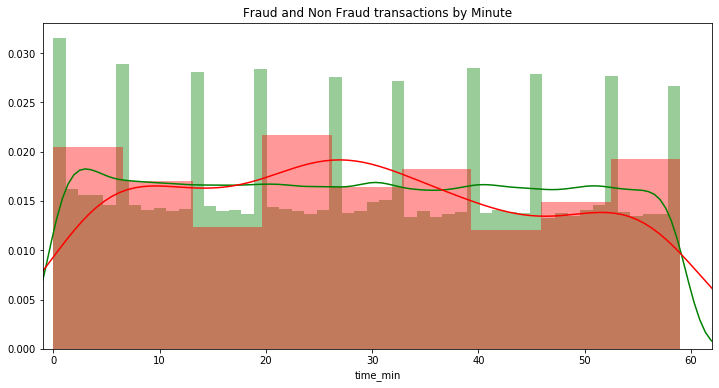

In [123]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Class']==0]['time_min'],color='g')
sns.distplot(df[df['Class']==1]['time_min'],color='r')
plt.title('Fraud and Non Fraud transactions by Minute')
plt.xlim([-1,62])
plt.show()


Don't sounds like a clear pattern of action


In [124]:
df_fraud=df[df['Class']==1]
df_non_fraud=df[df['Class']==0]
print('Fraud Sub Dataset Amount Description')
print(" ")
print(df_fraud['Amount'].describe())
print(" ")
print('Non Fraud Sub Dataset Amount Description') 
print(" ")
print(df_non_fraud['Amount'].describe())

Fraud Sub Dataset Amount Description
 
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
 
Non Fraud Sub Dataset Amount Description
 
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [125]:
df['Amount_log']=np.log(df['Amount']+0.01)

Text(0, 0.5, 'Log of Amount USD')

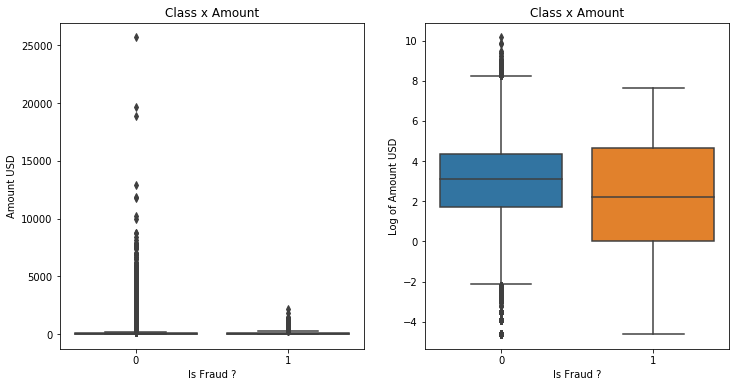

In [126]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax=sns.boxplot(x='Class',y='Amount',data=df)
ax.set_title('Class x Amount')
ax.set_xlabel('Is Fraud ?')
ax.set_ylabel('Amount USD')
plt.subplot(122)
ax1=sns.boxplot(x='Class',y='Amount_log',data=df)
ax1.set_title('Class x Amount')
ax1.set_xlabel('Is Fraud ?')
ax1.set_ylabel('Log of Amount USD')


The IQR (THE BOX) of fraudulent transactions are higher than normal transactions, but normal transactions have highest values

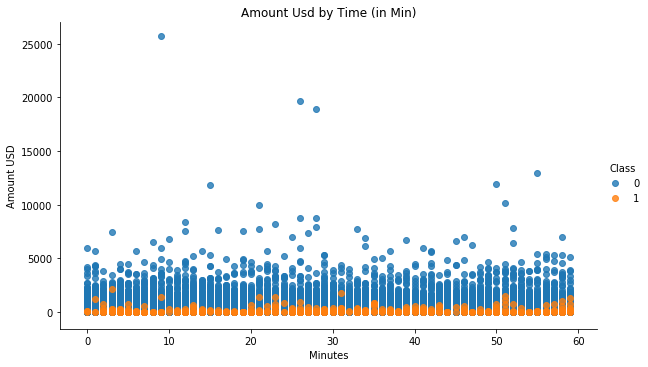

In [127]:
sns.lmplot(x='time_min',y='Amount',fit_reg=False,data=df,hue='Class',aspect=1.7)
plt.title('Amount Usd by Time (in Min)')
plt.xlabel('Minutes')
plt.ylabel('Amount USD')
plt.show()

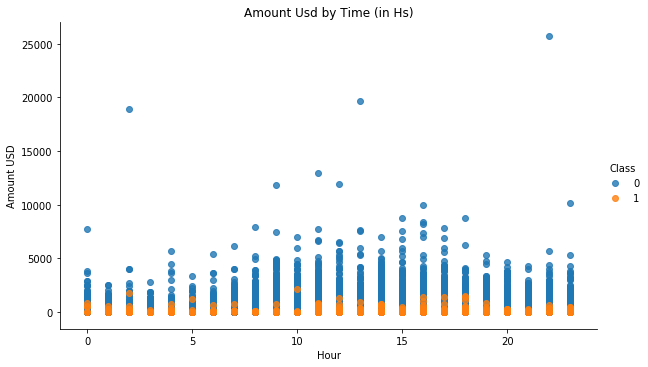

In [128]:
sns.lmplot(x='time_hour',y='Amount',fit_reg=False,data=df,hue='Class',aspect=1.7)
plt.title('Amount Usd by Time (in Hs)')
plt.xlabel('Hour')
plt.ylabel('Amount USD')
plt.show()

Lets Explore the distribution of the PCA 'V' variables

In [129]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'time_min', 'time_hour', 'Amount_log'],
      dtype='object')

In [130]:
columns = df.iloc[:,1:29].columns


In [131]:
columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [132]:

import matplotlib.gridspec as gridspec # to do the grid of plots


In [133]:
grid = gridspec.GridSpec(14, 2)
#28 features divided in a grid of 14 rows and two columns

We are trying to explore if any of the PCA Variables show a particular density destribution

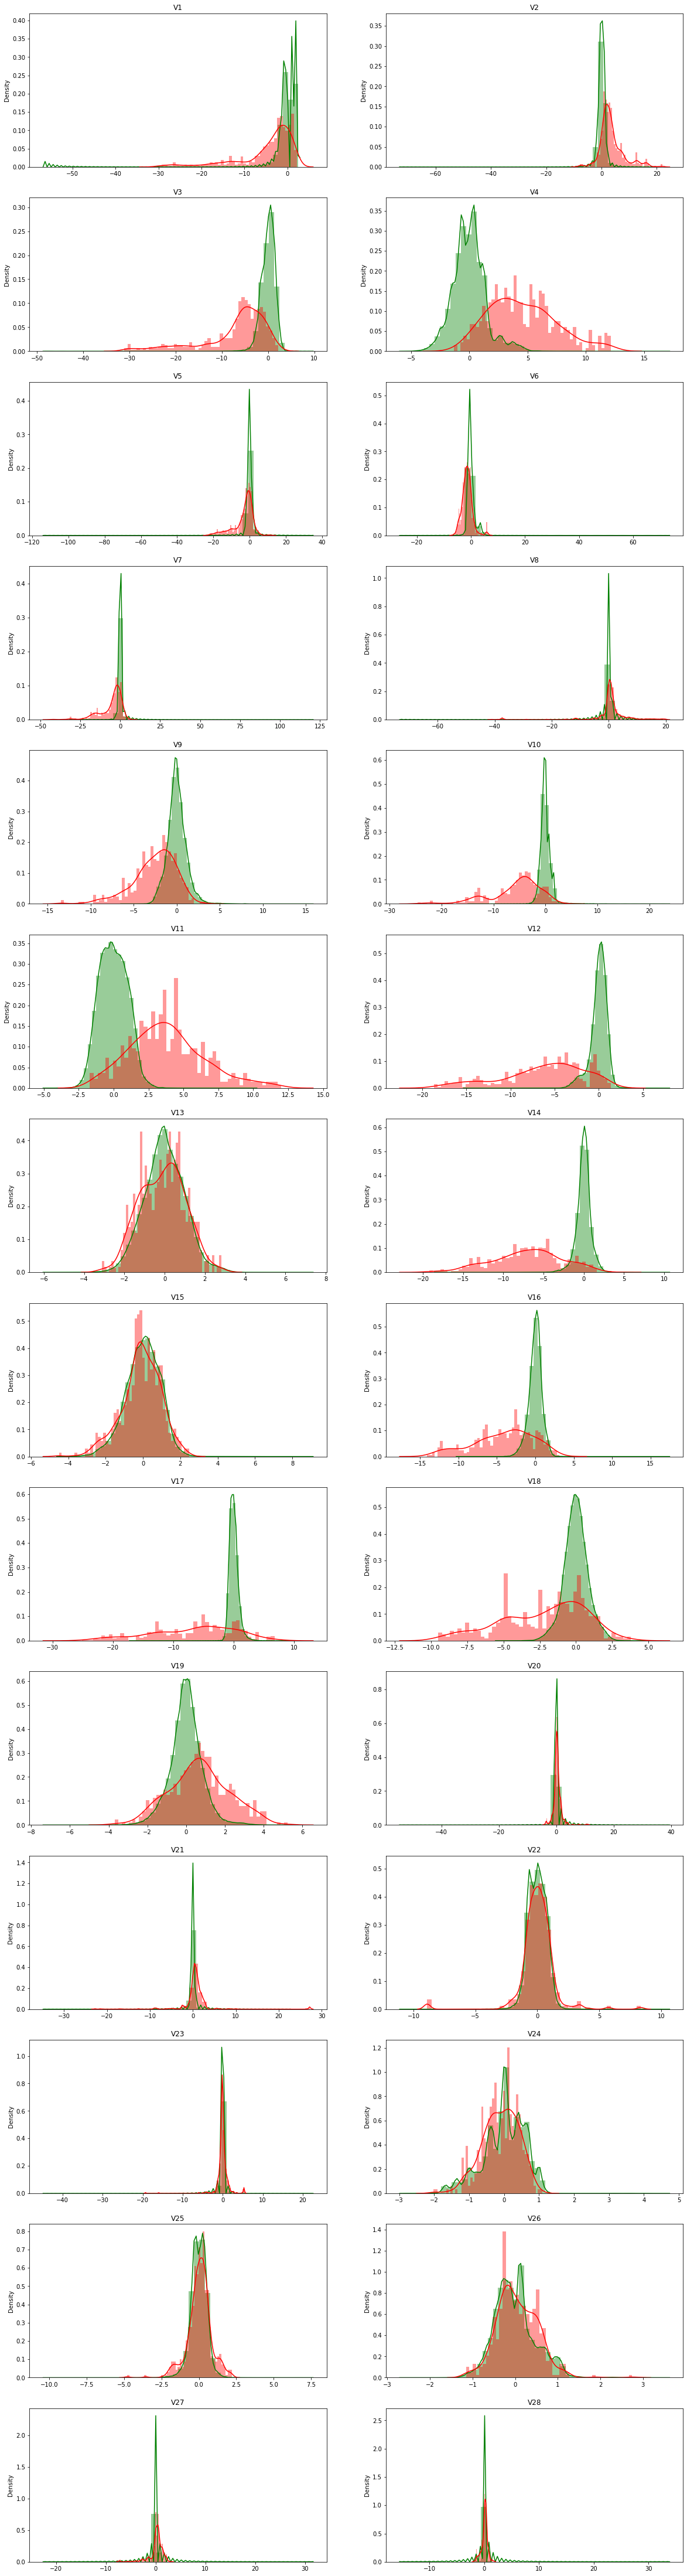

In [134]:
#Specifies the geometry of the grid that a subplot can be placed in.
plt.figure(figsize=(20,20*4))
for n, col in enumerate(df[columns]):
    ax=plt.subplot(grid[n])
    sns.distplot(df[df['Class']==0][col],bins=50,color='g')
    sns.distplot(df[df['Class']==1][col],bins=50,color='r')
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()



We can see a interesting different distribuition in some of our features like V4, V9, V16, V17 and a lot more.
Now let's take a look on time distribuition

In [135]:
import tensorflow as tf

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [136]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score


In [137]:
df=df.drop(columns='Amount_log')

In [138]:
df['Amount']=np.log(df['Amount']+0.001)

In [139]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,time_min,time_hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008105,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989913,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936641,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816249,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248367,0,0,0


In [141]:
X=df.drop(columns='Class')
y=df['Class']


In [191]:
def print_results(headline,true_value,pred):
    print(headline)
    print('accuracy: {}'.format(accuracy_score(true_value,pred)))
    print('precision: {}'.format(precision_score(true_value,pred)))
    print('recall: {}'.format(recall_score(true_value,pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))
    print('Roc Auc Score: {}'.format(roc_auc_score(true_value,pred)))


In [144]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [180]:
from sklearn.model_selection import GridSearchCV


In [181]:
param_grid = {"max_depth": [3,5,10, None],
              "n_estimators":[3,5,10,25],
              "max_features": [5,6,7,8],
               "criterion":['entropy','gini']}

# Creating the classifier
model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall',verbose=1,n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 24.2min finished


0.7819214540733528
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 7, 'n_estimators': 5}


In [182]:
classifier=grid_search.best_estimator_

In [183]:

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=42), \
                                   classifier)# build model with SMOTE imblearn

In [184]:
smote_pipeline

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        max_features=7, n_estimators=5))])

In [185]:
smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

Let's see out difference in balance between unsometed and smoted dataset

In [186]:
X_smote, y_smote = SMOTE().fit_sample(X, y)


In [187]:
print("Distribution of Original Dataset {}".format(Counter(y)))

print("Distribution of Oversampled Dataset using Smote {}".format(Counter(y_smote)))

Distribution of Original Dataset Counter({0: 284315, 1: 492})
Distribution of Oversampled Dataset using Smote Counter({0: 284315, 1: 284315})


In [192]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, smote_prediction))

print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))

print_results("\nSMOTE + RandomForest classification", y_test, smote_prediction)

Confusion Matrix: 
[[56764   100]
 [   14    84]]

SMOTE Pipeline Score 0.9979986657771848

SMOTE + RandomForest classification
accuracy: 0.9979986657771848
precision: 0.45652173913043476
recall: 0.8571428571428571
f2: 0.7291666666666666
Roc Auc Score: 0.9276921376316424


In [189]:
pred_proba_smote=smote_model.predict_proba(X_test)

In [190]:
print(classification_report(y_test,smote_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.46      0.86      0.60        98

    accuracy                           1.00     56962
   macro avg       0.73      0.93      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [159]:
import scikitplot as skplt


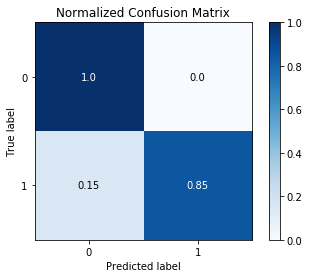

In [174]:
skplt.metrics.plot_confusion_matrix(y_test, smote_prediction, normalize=True)

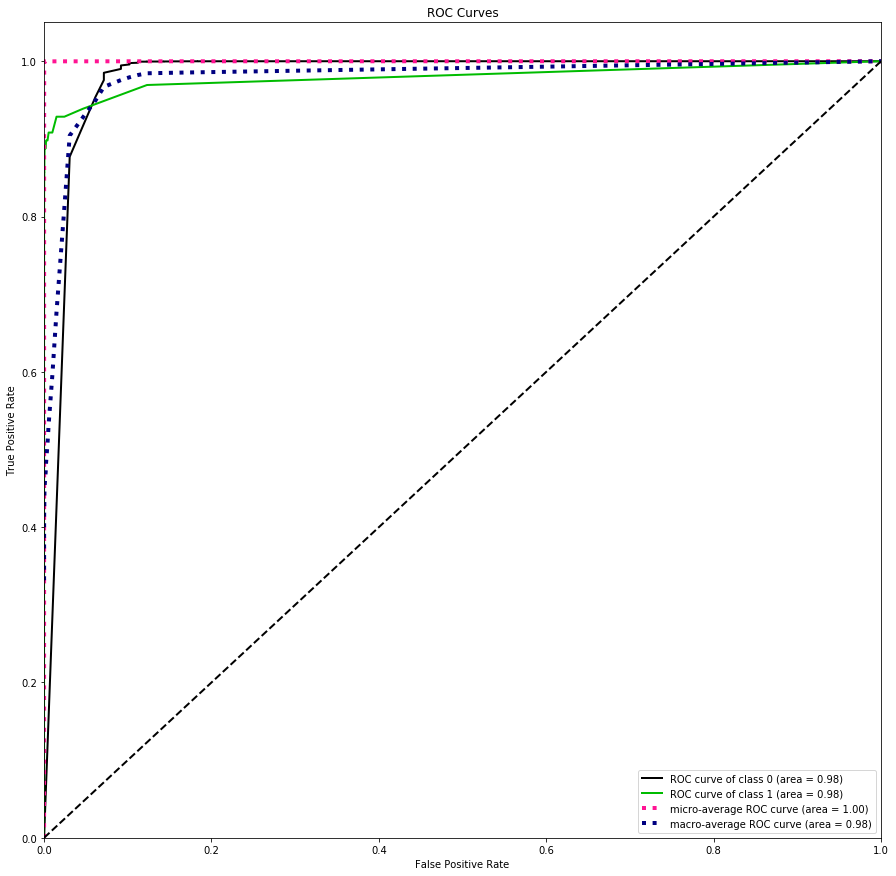

In [176]:
skplt.metrics.plot_roc(y_test,pred_proba_smote,figsize=(15,15))